In [60]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from python_speech_features import mfcc

In [61]:
frequency, wave = wavfile.read("agua.wav")
transcription = " Agua"

In [62]:
mfccs = mfcc(wave)
mfccs.shape

(165, 13)

In [63]:
delta_with_convolve = lambda arr: signal.convolve(arr, np.array([-1,0,1]), 'valid', 'direct')/3
delta_1 = np.apply_along_axis(
    delta_with_convolve, 
    0, 
    mfccs
)
delta_with_initial_zero=np.insert(delta_1,0,0, axis=0)
centered_deltas=np.insert(
    delta_with_initial_zero,
    delta_with_initial_zero.shape[0],
    0, 
    axis=0
)
mfccs_and_deltas = np.concatenate((mfccs, centered_deltas), axis=1)
mfccs_and_deltas.shape

(165, 26)

In [64]:
num_clusters = len(set(transcription)) + 1
num_clusters

6

In [65]:
kmeans = KMeans(n_clusters=num_clusters)
resuls = kmeans.fit(mfccs_and_deltas)

In [66]:
resuls.cluster_centers_.shape

(6, 26)

In [67]:
resuls.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [68]:
resuls.labels_.shape

(165,)

In [69]:
np.linspace(0,1,num_clusters)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [75]:
magma = get_cmap("viridis")
colors_array = magma(np.linspace(0,1,num_clusters))
colors_array[:,-1] = 0.5
colors_array

array([[0.267004, 0.004874, 0.329415, 0.5     ],
       [0.253935, 0.265254, 0.529983, 0.5     ],
       [0.163625, 0.471133, 0.558148, 0.5     ],
       [0.134692, 0.658636, 0.517649, 0.5     ],
       [0.477504, 0.821444, 0.318195, 0.5     ],
       [0.993248, 0.906157, 0.143936, 0.5     ]])

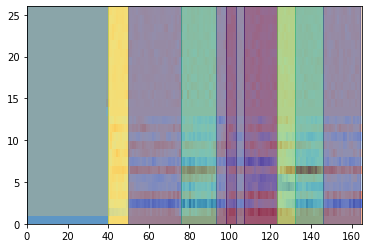

In [76]:
plt.pcolormesh(mfccs_and_deltas.T, cmap=get_cmap("coolwarm"))
current_label = 0
current_index = 0
for index, label in enumerate(resuls.labels_):
    if label!= current_label:
        plt.axvspan(current_index,index, color=colors_array[current_label])
        current_label = label
        current_index = index
plt.axvspan(current_index,index, color=colors_array[current_label])
        

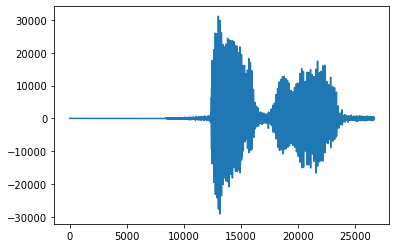

In [77]:
plt.plot(wave)

In [78]:
wave.shape

(26624,)

In [79]:
wave_mfcc_ratio = wave.shape[0] / resuls.labels_.shape[0]
wave_mfcc_ratio

161.35757575757575

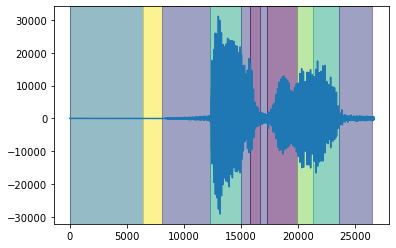

In [80]:
plt.plot(wave)
current_label = 0
current_index = 0
for index, label in enumerate(resuls.labels_):
    if label!= current_label:
        plt.axvspan(current_index,index*wave_mfcc_ratio, color=colors_array[current_label])
        current_label = label
        current_index = index*wave_mfcc_ratio
plt.axvspan(current_index,index*wave_mfcc_ratio, color=colors_array[current_label])
        